<a href="https://colab.research.google.com/github/OVP2023/time_series/blob/main/dz3_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выберите ряд из первого задания.
Постройте его модель ARIMA.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
!pip install statsmodels

In [3]:
import statsmodels.tsa.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
series = pd.read_csv("/content/drive/MyDrive/Datasets/VR/international-airline-passengers.csv")['Count'] #загрузка временного ряда

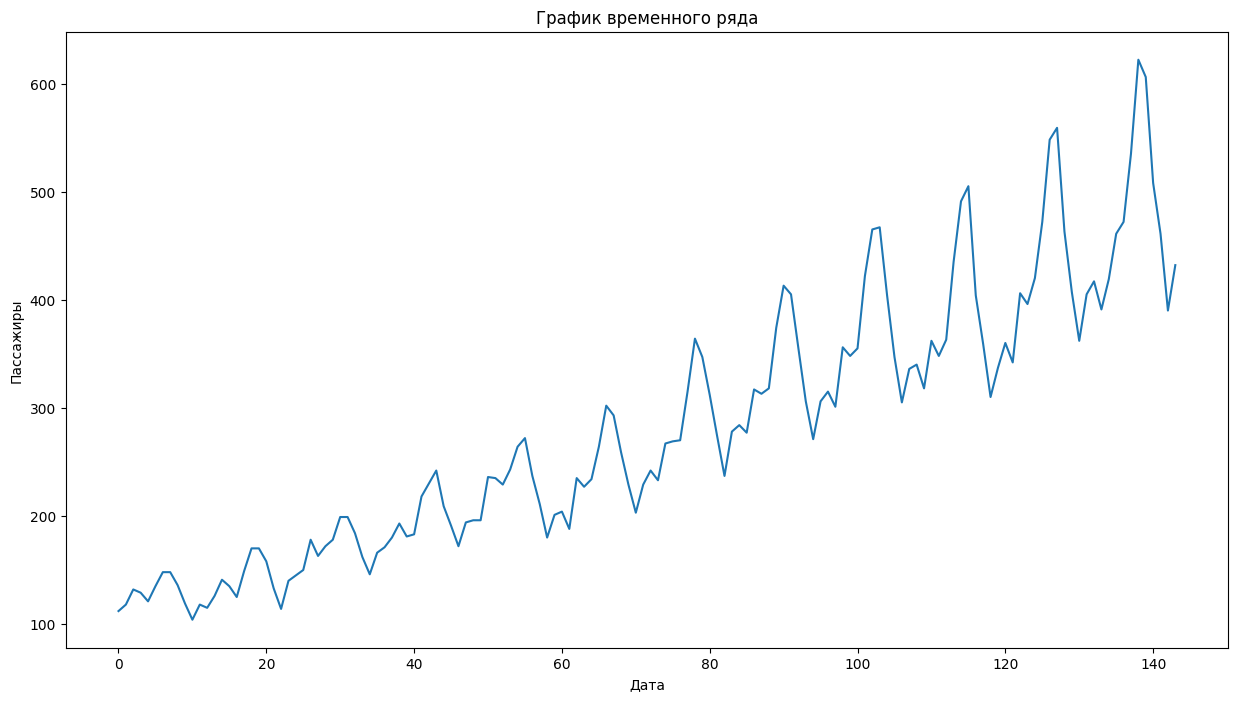

In [6]:
plt.figure(figsize=(15,8)) #визуализация временного ряда
plt.plot(series)
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Пассажиры')
plt.show()

In [7]:
import warnings
warnings.filterwarnings("ignore") #чтобы не выводить предупреждения системы

критерий информативности AIC (Akaike Information Criterion) позволяет нам сравнить разные модели и определить, какая из них лучше. AIC помогает оценить, насколько модель соответствует данным, учитывая ее сложность. Цель — найти модель с наименьшим значением AIC. В нашем примере aic: 1342.39041

In [8]:
#Определим оптимальные параметры модели ARIMA

best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = ARIMA(series, order=[i,d,j]).fit()
                tmp_aic = tmp_mdl.aic
                print('aic: {:6.5f} | order: {}'.format(tmp_aic, (i, j)))
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


aic: 1790.36758 | order: (0, 0)
aic: 1618.86253 | order: (0, 1)
aic: 1522.12614 | order: (0, 2)
aic: 1461.36206 | order: (0, 3)
aic: 1455.46230 | order: (0, 4)
aic: 1413.90912 | order: (0, 0)
aic: 1397.25757 | order: (0, 1)
aic: 1397.09346 | order: (0, 2)
aic: 1394.90915 | order: (0, 3)
aic: 1371.85001 | order: (0, 4)
aic: 1450.59595 | order: (0, 0)
aic: 1411.37491 | order: (0, 1)
aic: 1394.37284 | order: (0, 2)
aic: 1394.41031 | order: (0, 3)
aic: 1378.97556 | order: (0, 4)
aic: 1560.34913 | order: (0, 0)
aic: 1448.33094 | order: (0, 1)
aic: 1415.29158 | order: (0, 2)
aic: 1397.33227 | order: (0, 3)
aic: 1398.63721 | order: (0, 4)
aic: 1700.45578 | order: (0, 0)
aic: 1557.14011 | order: (0, 1)
aic: 1450.90185 | order: (0, 2)
aic: 1424.24667 | order: (0, 3)
aic: 1405.25589 | order: (0, 4)
aic: 1428.18053 | order: (1, 0)
aic: 1409.74872 | order: (1, 1)
aic: 1411.05102 | order: (1, 2)
aic: 1412.61481 | order: (1, 3)
aic: 1388.71665 | order: (1, 4)
aic: 1401.85213 | order: (1, 0)
aic: 139

In [9]:
print(best_mdl.params)

ar.L1      -0.034577
ar.L2       1.022400
ar.L3      -0.067466
ar.L4      -0.806842
ma.L1      -0.048533
ma.L2      -1.552564
ma.L3      -0.030104
ma.L4       0.990009
sigma2    566.258531
dtype: float64


Визуализируем двумя способами получившуюся модель ARIMA

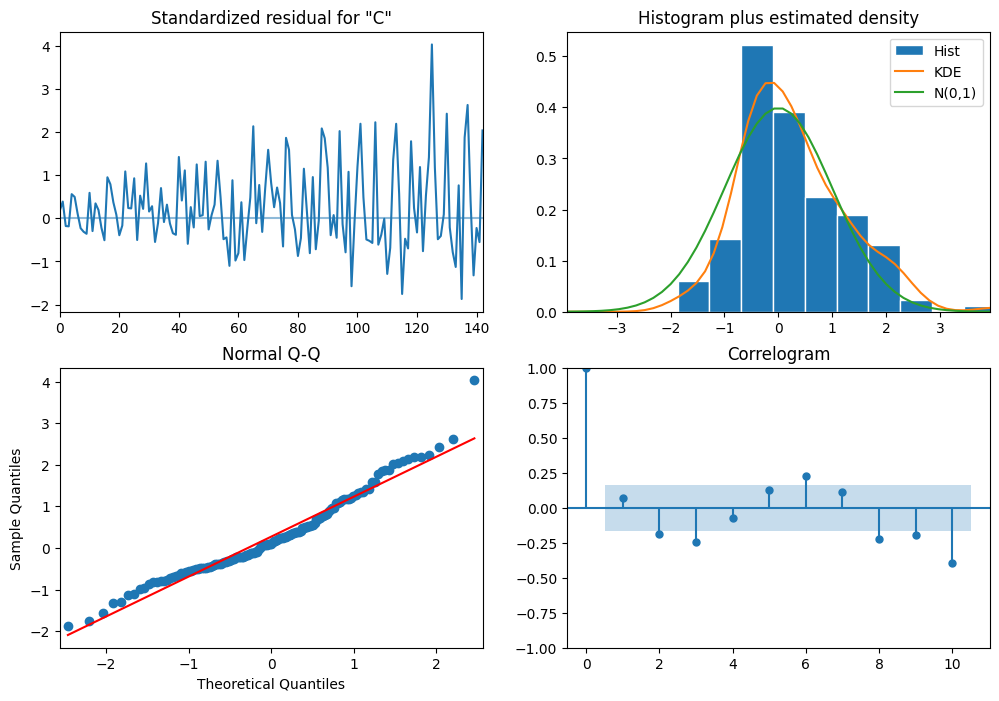

In [10]:
best_mdl.plot_diagnostics(figsize=(12, 8))
plt.show()

In [11]:
resid = best_mdl.resid

stats.normaltest(resid)

NormaltestResult(statistic=30.24712029833709, pvalue=2.703468293402351e-07)

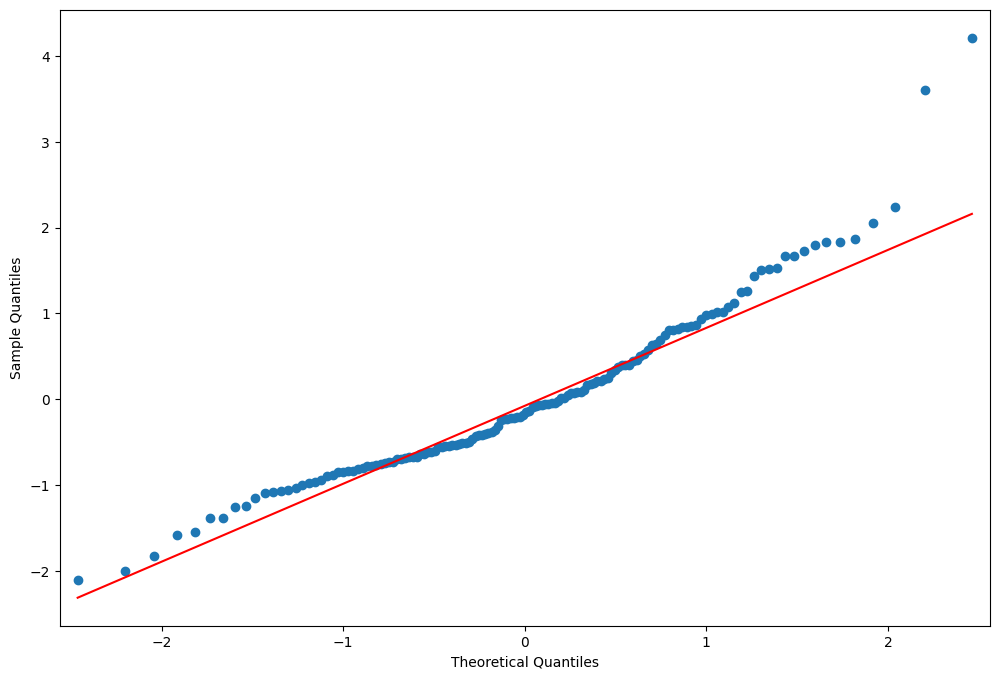

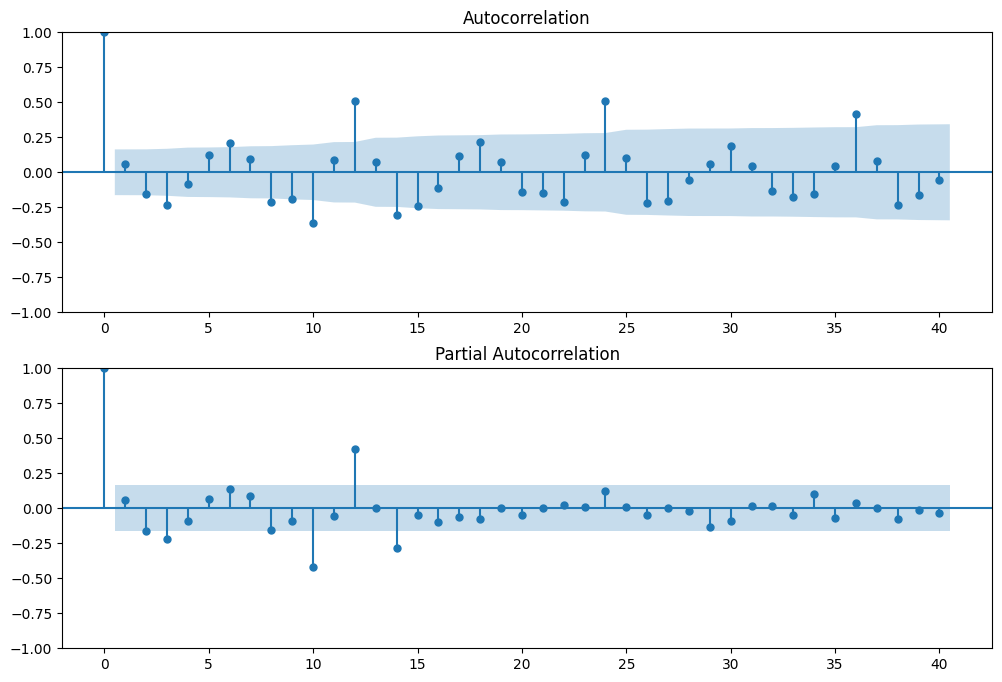

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.plot_pacf(resid, lags=40, ax=ax2)